In [1]:
#!pip install pandas
import pandas as pd

#!pip install warnings
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("LoanStats3c.csv")
df1 = pd.read_csv("LoanStats3c.csv")
pd.set_option('display.max_columns', len(df.columns))
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,is_inc_v,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
0,29003494,31526675,28000,28000,28000,36 months,7.12%,866.10,A,A3,attorney,5 years,MORTGAGE,324388.0,Verified,Sep-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,331xx,FL,9.35,0,Aug-01,1,NaN,NaN,23,0,35236,38.70%,34,w,27300.03,27300.03,866.10,866.10,699.97,166.13,0.0,0.0,0.0,Nov-14,866.10,Nov-14,Oct-14,0,NaN,1
1,28913233,31436395,3000,3000,3000,36 months,11.67%,99.18,B,B4,Eligibility Worker II,6 years,MORTGAGE,41500.0,Not Verified,Sep-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,other,Other,961xx,CA,26.55,0,Sep-99,1,NaN,NaN,12,0,11749,78.90%,29,w,2930.00,2930.00,99.18,99.18,70.00,29.18,0.0,0.0,0.0,Oct-14,99.18,Nov-14,Oct-14,0,NaN,1
2,27592013,30095159,18000,18000,18000,36 months,13.98%,615.03,C,C3,LABORATORY MANAGER,8 years,MORTGAGE,165000.0,Verified,Sep-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,937xx,CA,27.36,0,Apr-89,0,27.0,NaN,15,0,15893,60%,50,f,17594.67,17594.67,615.03,615.03,405.33,209.70,0.0,0.0,0.0,Nov-14,615.03,Nov-14,Oct-14,0,27.0,1
3,28172444,30685592,15000,15000,15000,60 months,20.20%,399.08,E,E3,Housing Counselor,1 year,RENT,67000.0,Source Verified,Sep-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,946xx,CA,8.90,0,Sep-86,1,70.0,65.0,11,1,1997,24.40%,58,f,14853.42,14853.42,399.08,399.08,146.58,252.50,0.0,0.0,0.0,Nov-14,399.08,Nov-14,Oct-14,0,70.0,1
4,20349337,22622030,23275,23275,23275,60 months,17.57%,585.61,D,D4,Process Improvement Officer,7 years,MORTGAGE,54264.0,Not Verified,Sep-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,352xx,AL,33.02,0,Aug-02,0,57.0,NaN,11,0,18580,59.60%,23,w,23018.82,23018.82,585.61,585.61,256.18,329.43,0.0,0.0,0.0,Nov-14,585.61,Dec-14,Oct-14,0,57.0,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161231 entries, 0 to 161230
Data columns (total 52 columns):
id                             161231 non-null int64
member_id                      161231 non-null int64
loan_amnt                      161231 non-null int64
funded_amnt                    161231 non-null int64
funded_amnt_inv                161231 non-null int64
term                           161231 non-null object
int_rate                       161231 non-null object
installment                    161231 non-null float64
grade                          161231 non-null object
sub_grade                      161231 non-null object
emp_title                      152048 non-null object
emp_length                     153250 non-null object
home_ownership                 161231 non-null object
annual_inc                     161231 non-null float64
is_inc_v                       161231 non-null object
issue_d                        161231 non-null object
loan_status                 

In [3]:
df.term.value_counts()

 36 months    112374
 60 months     48857
Name: term, dtype: int64

In [4]:
df['term'] = df['term'].apply(lambda x:x.replace("months" , ''))
df['term'] = pd.Categorical(df['term'])
# term is in the rate of months , since it is either 36 or 60 months
# we can make it into a categorical value
df['int_rate'] = df["int_rate"].apply(lambda x:x.replace('%',''))
df['int_rate'] = pd.to_numeric(df['int_rate'])
df['int_rate'] = (df['int_rate'])/100
# int_rate is in the rate of percentage
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,is_inc_v,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
0,29003494,31526675,28000,28000,28000,36,0.0712,866.10,A,A3,attorney,5 years,MORTGAGE,324388.0,Verified,Sep-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,331xx,FL,9.35,0,Aug-01,1,NaN,NaN,23,0,35236,38.70%,34,w,27300.03,27300.03,866.10,866.10,699.97,166.13,0.0,0.0,0.0,Nov-14,866.10,Nov-14,Oct-14,0,NaN,1
1,28913233,31436395,3000,3000,3000,36,0.1167,99.18,B,B4,Eligibility Worker II,6 years,MORTGAGE,41500.0,Not Verified,Sep-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,other,Other,961xx,CA,26.55,0,Sep-99,1,NaN,NaN,12,0,11749,78.90%,29,w,2930.00,2930.00,99.18,99.18,70.00,29.18,0.0,0.0,0.0,Oct-14,99.18,Nov-14,Oct-14,0,NaN,1


In [5]:
df.grade.value_counts()

C    45257
B    42811
D    30420
A    22918
E    14066
F     4473
G     1286
Name: grade, dtype: int64

In [6]:
#!pip install sklearn

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.grade = le.fit_transform(df.grade)
df.grade = pd.Categorical(df.grade)

# A = 0
# B = 1
# C = 2
# D = 3
# E = 4
# F = 5
# G = 6

In [7]:
le = preprocessing.LabelEncoder()
df.sub_grade = le.fit_transform(df.sub_grade)
df.sub_grade = pd.to_numeric(df.sub_grade)

In [8]:
# !pip install numpy

import numpy as np

print(len(np.unique(df.member_id)) == len(df))

# Every member ID is unique so we can use it as our index

df.index = df['member_id']

True


In [9]:
(df.loan_amnt.corr(df.funded_amnt) , df.loan_amnt.corr(df.funded_amnt_inv) , df.out_prncp.corr(df.out_prncp_inv))

# Loan amount and funded amount is the same column so we can drop one of them
# Loan amount and funded_amnt_inv is extremely close to one as well so we can drop it too
# Same for out_prncp and out_prncp_inv

(1.0, 0.9999964091849711, 0.9999970841085081)

In [10]:
df.drop(["funded_amnt","funded_amnt_inv" , "mths_since_last_major_derog" , 
         "mths_since_last_record" , 'desc' , "emp_title", "title" ,
        "url" , "zip_code" , "addr_state", "id" , "member_id" , "last_pymnt_d"
        , "next_pymnt_d" , "last_credit_pull_d" , "issue_d" , 
        "earliest_cr_line" , 'out_prncp_inv'] , axis = 1 , inplace = True)

In [11]:
df.home_ownership.value_counts()

MORTGAGE    83148
RENT        62752
OWN         15330
ANY             1
Name: home_ownership, dtype: int64

In [12]:
df.is_inc_v.value_counts()

Source Verified    65813
Not Verified       49109
Verified           46309
Name: is_inc_v, dtype: int64

In [13]:
df.pymnt_plan.value_counts()

n    161219
y        12
Name: pymnt_plan, dtype: int64

In [14]:
df.initial_list_status.value_counts()

w    80958
f    80273
Name: initial_list_status, dtype: int64

In [15]:
# Cleaning the data, replacing the categorical strings to numerical values
# And changing it to a categorical variable in the dataframe

df.replace(["MORTGAGE" , 'RENT' , 'OWN' , 'ANY'] , [0,1,2,3] , inplace = True)
df.home_ownership = pd.Categorical(df.home_ownership)
df.replace(["Source Verified" , "Not Verified" , "Verified"] , [0,1,2] , inplace = True)
df.is_inc_v = pd.Categorical(df.is_inc_v)
df.pymnt_plan.replace(['n' , 'y'] , (0,1), inplace = True)
df.pymnt_plan = pd.Categorical(df.pymnt_plan)
df.initial_list_status.replace(['w' , 'f'] , (0,1) , inplace = True)
df.initial_list_status = pd.Categorical(df.initial_list_status)
df.policy_code = pd.Categorical(df.policy_code)
df.inq_last_6mths = pd.Categorical(df.inq_last_6mths)

In [16]:
df.purpose.value_counts()

debt_consolidation    96825
credit_card           38708
home_improvement       9342
other                  6850
major_purchase         2660
medical                1645
small_business         1611
car                    1262
moving                  883
vacation                838
house                   523
renewable_energy         77
wedding                   7
Name: purpose, dtype: int64

In [17]:
# Best way to categoricalize these values is to use the get dummies function
# of pandas then concat it with the original dataset

df2 = (pd.get_dummies(df.purpose))
df2 = pd.DataFrame(df2)
df2 = df2.astype("category")
df3 = pd.concat([df,df2] , axis = 1)
df = df3
df.drop("purpose" , axis = 1 , inplace = True)

In [18]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,is_inc_v,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
member_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31526675,28000,36,0.0712,866.10,0,2,5 years,0,324388.0,2,Current,0,9.35,0,1,NaN,23,0,35236,38.70%,34,0,27300.03,866.10,866.10,699.97,166.13,0.0,0.0,0.0,866.10,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
31436395,3000,36,0.1167,99.18,1,8,6 years,0,41500.0,1,Current,0,26.55,0,1,NaN,12,0,11749,78.90%,29,0,2930.00,99.18,99.18,70.00,29.18,0.0,0.0,0.0,99.18,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
30095159,18000,36,0.1398,615.03,2,12,8 years,0,165000.0,2,Current,0,27.36,0,0,27.0,15,0,15893,60%,50,1,17594.67,615.03,615.03,405.33,209.70,0.0,0.0,0.0,615.03,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
30685592,15000,60,0.2020,399.08,4,22,1 year,1,67000.0,0,Current,0,8.90,0,1,70.0,11,1,1997,24.40%,58,1,14853.42,399.08,399.08,146.58,252.50,0.0,0.0,0.0,399.08,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
22622030,23275,60,0.1757,585.61,3,18,7 years,0,54264.0,1,Current,0,33.02,0,0,57.0,11,0,18580,59.60%,23,0,23018.82,585.61,585.61,256.18,329.43,0.0,0.0,0.0,585.61,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [19]:
df.loan_status.value_counts()

Current               151208
Fully Paid              6922
Late (31-120 days)      1362
In Grace Period          853
Late (16-30 days)        409
Charged Off              400
Default                   76
Issued                     1
Name: loan_status, dtype: int64

In [20]:
df.loan_status.replace(['Fully Paid' , 'Current' , 'Issued' , 'In Grace Period'
                       , 'Late (16-30 days)' , 'Late (31-120 days', 'Charged Off'
                       , 'Default'] , ("A" , "B" , "C" , "D" , "E" , "F" , "G" , "H")
                      , inplace = True)
df.loan_status = le.fit_transform(df.loan_status)
df.loan_status = pd.Categorical(df.loan_status)

In [21]:
df.isnull().sum()

loan_amnt                         0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                     7981
home_ownership                    0
annual_inc                        0
is_inc_v                          0
loan_status                       0
pymnt_plan                        0
dti                               0
delinq_2yrs                       0
inq_last_6mths                    0
mths_since_last_delinq        80223
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                       84
total_acc                         0
initial_list_status               0
out_prncp                         0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee          

In [22]:
df.emp_length.value_counts()

10+ years    54253
2 years      13995
3 years      12519
< 1 year     12005
1 year        9974
7 years       9224
5 years       9180
4 years       9109
6 years       8416
8 years       8159
9 years       6416
Name: emp_length, dtype: int64

In [23]:
# I need a placeholder for the N/A values otherwise
# I cannot use the lambda function, so I will use "300 years" and "100000%" to fill N/A values

df.emp_length = df.emp_length.fillna("300 years")
df['emp_length'] = df["emp_length"].apply(lambda x:x.replace('years',''))
df['emp_length'] = df["emp_length"].apply(lambda x:x.replace('year',''))
df['emp_length'] = df["emp_length"].apply(lambda x:x.replace('10+','11'))
df['emp_length'] = df["emp_length"].apply(lambda x:x.replace('< 1','0.5'))
df['emp_length'] = pd.to_numeric(df['emp_length'])

In [24]:
# I will now use linear regression to replace the placeholders
# Instead of dropping the missing values or replacing it with a mean or median
# The best way I believe is using linear regression to find the best educated
# guess for those missing values

In [25]:
X_test = df[df.emp_length == 300].drop(["emp_length" , "mths_since_last_delinq"
                                       ,"revol_util"  ] , axis = 1)
X_train = df[df.emp_length != 300].drop(["emp_length" , "mths_since_last_delinq"
                                       ,"revol_util"  ] , axis = 1)
y_test = df.emp_length[df.emp_length == 300]
y_train = df.emp_length[df.emp_length != 300]

In [26]:
# !pip install sklearn

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train , y_train)
y_pred = np.rint(linreg.predict(X_test))
abc = (y_pred)
df.emp_length[df.emp_length == 300] = abc

In [27]:
df.revol_util = df.revol_util.fillna("100000%")
df['revol_util'] = df["revol_util"].apply(lambda x:x.replace('%',''))
df['revol_util'] = pd.to_numeric(df['revol_util'])

In [28]:
X_test = df[df.revol_util == 100000].drop(["mths_since_last_delinq"
                                       ,"revol_util"  ] , axis = 1)
X_train = df[df.revol_util != 100000].drop(["mths_since_last_delinq"
                                       ,"revol_util"  ] , axis = 1)
y_test = df.revol_util[df.revol_util == 100000]
y_train = df.revol_util[df.revol_util != 100000]

In [29]:
linreg = LinearRegression()
linreg.fit(X_train , y_train)
y_pred = np.rint(linreg.predict(X_test))
abc = (y_pred)
df.revol_util[df.revol_util == 100000] = abc
df.revol_util =( df.revol_util)/(100)

In [30]:
df.mths_since_last_delinq = df.mths_since_last_delinq.fillna(10000000)

X_test = df[df.mths_since_last_delinq == 10000000].drop(["mths_since_last_delinq"] , axis = 1)
X_train = df[df.mths_since_last_delinq != 10000000].drop(["mths_since_last_delinq"] , axis = 1)
y_test = df.mths_since_last_delinq[df.mths_since_last_delinq == 10000000]
y_train = df.mths_since_last_delinq[df.mths_since_last_delinq != 10000000]

In [31]:
linreg = LinearRegression()
linreg.fit(X_train , y_train)
y_pred = np.rint(linreg.predict(X_test))
abc = (y_pred)
df.mths_since_last_delinq[df.mths_since_last_delinq == 10000000] = abc

In [32]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,is_inc_v,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
member_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31526675,28000,36,0.0712,866.10,0,2,5.0,0,324388.0,2,1,0,9.35,0,1,38.0,23,0,35236,0.387,34,0,27300.03,866.10,866.10,699.97,166.13,0.0,0.0,0.0,866.10,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
31436395,3000,36,0.1167,99.18,1,8,6.0,0,41500.0,1,1,0,26.55,0,1,42.0,12,0,11749,0.789,29,0,2930.00,99.18,99.18,70.00,29.18,0.0,0.0,0.0,99.18,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
30095159,18000,36,0.1398,615.03,2,12,8.0,0,165000.0,2,1,0,27.36,0,0,27.0,15,0,15893,0.600,50,1,17594.67,615.03,615.03,405.33,209.70,0.0,0.0,0.0,615.03,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
30685592,15000,60,0.2020,399.08,4,22,1.0,1,67000.0,0,1,0,8.90,0,1,70.0,11,1,1997,0.244,58,1,14853.42,399.08,399.08,146.58,252.50,0.0,0.0,0.0,399.08,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
22622030,23275,60,0.1757,585.61,3,18,7.0,0,54264.0,1,1,0,33.02,0,0,57.0,11,0,18580,0.596,23,0,23018.82,585.61,585.61,256.18,329.43,0.0,0.0,0.0,585.61,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [33]:
df["monthly_loan_income_%"] = df.installment/(( df.annual_inc/12) 
                                              - (df.annual_inc/12)*(df.dti/100))
df["monthly_loan_income_%"] = np.round(df["monthly_loan_income_%"],4)
# Let's figure out the percentage of the monthly payment from their
# monthly income - dti
# this column is in DECIMAL FORM NOT PERCENTAGE FORM

In [34]:
#Rearranging the columns so we can see them side by side

cols = list(df)
cols.insert(3, cols.pop(cols.index("annual_inc")))
cols.insert(5, cols.pop(cols.index("monthly_loan_income_%")))
df = df.ix[:, cols]


In [35]:
df["revol_avail"] = np.rint(df.revol_bal - df.revol_bal*df.revol_util)

# Creating a new variable to see how much available revolving credit for the
# client to further examine the financial status of the client(s)

In [36]:
cols = list(df)
cols.insert(6, cols.pop(cols.index("revol_bal")))
cols.insert(7, cols.pop(cols.index("revol_util")))
cols.insert(8, cols.pop(cols.index("revol_avail")))
df = df.ix[:, cols]
df.head()

,loan_amnt,term,int_rate,annual_inc,installment,monthly_loan_income_%,revol_bal,revol_util,revol_avail,grade,sub_grade,emp_length,home_ownership,is_inc_v,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,total_acc,initial_list_status,out_prncp,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,car,credit_card,debt_consolidation,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
member_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
31526675,28000,36,0.0712,324388.0,866.10,0.0353,35236,0.387,21600.0,0,2,5.0,0,2,1,0,9.35,0,1,38.0,23,0,34,0,27300.03,866.10,866.10,699.97,166.13,0.0,0.0,0.0,866.10,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
31436395,3000,36,0.1167,41500.0,99.18,0.0390,11749,0.789,2479.0,1,8,6.0,0,1,1,0,26.55,0,1,42.0,12,0,29,0,2930.00,99.18,99.18,70.00,29.18,0.0,0.0,0.0,99.18,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
30095159,18000,36,0.1398,165000.0,615.03,0.0616,15893,0.600,6357.0,2,12,8.0,0,2,1,0,27.36,0,0,27.0,15,0,50,1,17594.67,615.03,615.03,405.33,209.70,0.0,0.0,0.0,615.03,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
30685592,15000,60,0.2020,67000.0,399.08,0.0785,1997,0.244,1510.0,4,22,1.0,1,0,1,0,8.90,0,1,70.0,11,1,58,1,14853.42,399.08,399.08,146.58,252.50,0.0,0.0,0.0,399.08,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
22622030,23275,60,0.1757,54264.0,585.61,0.1933,18580,0.596,7506.0,3,18,7.0,0,1,1,0,33.02,0,0,57.0,11,0,23,0,23018.82,585.61,585.61,256.18,329.43,0.0,0.0,0.0,585.61,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0


In [37]:
df["potential_risk"] = pd.Categorical(np.logical_or(np.logical_or(np.logical_or
                                     (np.logical_and(df.is_inc_v == 1  , 
                                                     df.delinq_2yrs >= 1),
                                      pd.to_numeric(df.loan_status) >= 4) , 
                                     df.recoveries > 0 ),pd.to_numeric(df.grade)>2).astype('uint8'))

np.logical_or(np.logical_or(np.logical_or
                                     (np.logical_and(df.is_inc_v == 1  , 
                                                     df.delinq_2yrs >= 1),
                                      pd.to_numeric(df.loan_status) >= 4), 
                                     df.recoveries > 0 ),pd.to_numeric(df.grade)>2).astype('uint8').value_counts()

# Creating a new variable "potential_risk":
# is the income not verified and did they have a delinquency in the past two yrs
# OR is their loan status a 4 or higher OR was their recoveries greater than 0
# OR is their loan grade higher than a C?

# Banks and other financial institutes should be aware of those that can be a 
# potential risk which I think is a imperative variable for this dataset.

# 59203 people are potential risks based on my criteria

0    102028
1     59203
Name: is_inc_v, dtype: int64

In [38]:
df["red_flag"] = pd.Categorical(np.logical_or(np.logical_and(np.logical_and
                                (df.is_inc_v == 1  , df.delinq_2yrs >= 1),
                                pd.to_numeric(df.loan_status) >= 5), 
                                  pd.to_numeric(df.grade)>=4).astype('uint8'))


np.logical_or(np.logical_and(np.logical_and(df.is_inc_v == 1  , df.delinq_2yrs >= 1) , 
               pd.to_numeric(df.loan_status) >= 5) , pd.to_numeric(df.grade)>=4).value_counts()

# Creating a new variable"red_flag" which takes into account if the income has 
# NOT been verified AND if there was at least one delenquincy the past 2 years 
# AND if the loan status is a 4 or higher.

# Red flag is the variable for the company to take a good look at on whether or
# not they should give the client the loan since their income is not verified
# they had at least 1 delinquincy in the past two years and the loan status is
# a 5 (Late(31-120 days)) or higher. 
# OR is their loan grade an E or higher? 

# There are 19896 people that based on my criteria are red flags for loans.

False    141335
True      19896
Name: is_inc_v, dtype: int64

In [39]:
# Descriptive Statistics

df.installment.describe().apply(lambda x: format(x, 'f'))

# Here we can see there are at least two outliers since the mean is 446 and
# the min is 23 while the max is 1409.99

count    161231.000000
mean        446.003881
std         245.922837
min          23.360000
25%         267.790000
50%         387.240000
75%         585.390000
max        1409.990000
Name: installment, dtype: object

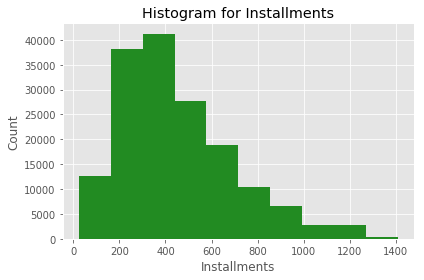

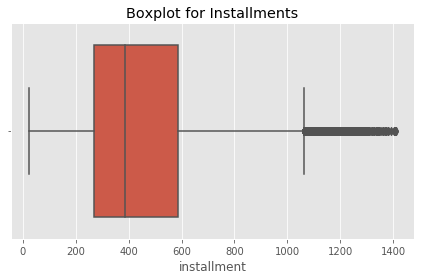

In [40]:
# !pip install matplotlib.pyplot
# !pip install seaborn

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import seaborn as sns


plt.hist(df.installment, color = "forestgreen")
plt.title("Histogram for Installments")
plt.xlabel("Installments")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

sns.boxplot(df.installment)
plt.title("Boxplot for Installments")
plt.tight_layout()
plt.show()

# When we look at our histogram we can see it is skewed to the right
# For our boxplot we can see we have a numerous amount of outliers
# I believe keeping the outliers is important in this dataset because
# there are valid reasons to why there are outliers, the installment
# is based on the loan amount which is also based on annual income
# some people make more money than others thus they have a larger installment number.

In [41]:
df["monthly_loan_income_%"].describe().apply(lambda x: format(x, 'f'))

count    161231.000000
mean          0.099820
std           0.051965
min           0.000700
25%           0.059600
50%           0.092100
75%           0.133700
max           0.332800
Name: monthly_loan_income_%, dtype: object

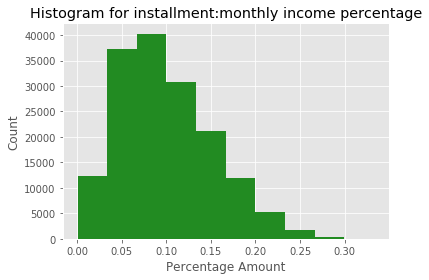

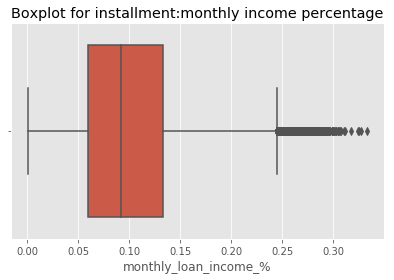

In [42]:
plt.hist(df['monthly_loan_income_%'], color = "forestgreen")
plt.title("Histogram for installment:monthly income percentage")
plt.xlabel("Percentage Amount")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

sns.boxplot(df["monthly_loan_income_%"])
plt.title("Boxplot for installment:monthly income percentage")
plt.tight_layout()
plt.show()

# Here we can see again our histogramis skewed to the right and
# there are outliers for the loan amount

In [43]:
cols = list(df)
cols.insert(-1, cols.pop(cols.index("term")))
cols.insert(-2, cols.pop(cols.index("grade")))
cols.insert(-3, cols.pop(cols.index("home_ownership")))
cols.insert(-4, cols.pop(cols.index("is_inc_v")))
cols.insert(-5, cols.pop(cols.index("loan_status")))
cols.insert(-6, cols.pop(cols.index("pymnt_plan")))
cols.insert(-7, cols.pop(cols.index("inq_last_6mths")))
cols.insert(-8, cols.pop(cols.index("initial_list_status")))
df = df.ix[:, cols]

# Rearranging the columns so we can slice it easier for our scaling

In [44]:
#!pip install scipy
from scipy.stats import skew

print("Mean of skewness:",np.round(np.mean(skew(df.iloc[:-1,0:26])),2))
print("Median of skewness:",np.round(np.median(skew(df.iloc[:-1,0:26])),2))
print("Min of skewness:",np.round(min(skew(df.iloc[:-1,0:26])),2))
print("Max of skewness:",np.round(max(skew(df.iloc[:-1,0:26])),2))

# Here we can see there is a huge skewness of the data so we can use a scaler
# to help with the skewness

Mean of skewness: 28.23
Median of skewness: 3.34
Min of skewness: -0.14
Max of skewness: 275.23


In [45]:
from sklearn.preprocessing import scale

df.iloc[:-1,0:26] = scale(df.iloc[:-1,0:26])

C:\Users\Ali\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
# So now our business problem, can we create a model that can give us a good
# accuracy on who would be a potential risk when applying for a loan?

In [47]:
df.potential_risk.value_counts()

# Here we can see there is in imbalancement on the target variable so we can
# resample it to rebalance it

0    102028
1     59203
Name: potential_risk, dtype: int64

In [48]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.potential_risk==0]
df_minority = df[df.potential_risk==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=102028,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.potential_risk.value_counts()

1    102028
0    102028
Name: potential_risk, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

X_risk = df_upsampled.drop(["potential_risk" , "red_flag"] , axis = 1)

# Dropping the red_flag column because it is similar to our target variable:
# potential risk

y_risk = df_upsampled.potential_risk


X_train, X_val, y_train, y_val = train_test_split(X_risk, y_risk, 
                                                  test_size = 0.25, random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


logreg = LogisticRegression()
logreg.fit(X_train , y_train)
y_pred = logreg.predict(X_val)

print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val , y_pred))
print(accuracy_score(y_val , y_pred))
print("AUROC:", roc_auc_score(y_val.tolist(), y_pred))
print("This is the category the model is predicting:",np.unique(y_pred))

# Our logistic regression accuracy gives us an ~92% along with our AUROC score
# which is solid.

C:\Users\Ali\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[23592  1941]
 [ 2273 23208]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.92     25533
           1       0.92      0.91      0.92     25481

   micro avg       0.92      0.92      0.92     51014
   macro avg       0.92      0.92      0.92     51014
weighted avg       0.92      0.92      0.92     51014

0.9173952248402399
AUROC: 0.9173885051999022
This is the category the model is predicting: [0 1]


In [51]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.fit(X_train , y_train.tolist())
y_pred_DT = tree.predict(X_val)
print(classification_report(y_val , y_pred_DT))
print("accuracy:",round(accuracy_score(y_val , y_pred_DT)*100,2) , "%")
print("AUROC:", roc_auc_score(y_val.tolist(), y_pred_DT))
print("This is the category the model is predicting:",np.unique(y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25533
           1       1.00      1.00      1.00     25481

   micro avg       1.00      1.00      1.00     51014
   macro avg       1.00      1.00      1.00     51014
weighted avg       1.00      1.00      1.00     51014

accuracy: 100.0 %
AUROC: 1.0
This is the category the model is predicting: [0 1]


In [52]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(n_estimators=100)

RF.fit(X_train,y_train.tolist())

y_pred_RF=RF.predict(X_val)
print(classification_report(y_val , y_pred_RF))
print("accuracy:",(accuracy_score(y_val , y_pred_RF)*100) , "%")
print("AUROC:", roc_auc_score(y_val.tolist(), y_pred_RF))
# why AUROC isnt effective, AUROC will not be effective for business decisions like false positives, false negatives
print("This is the category the model is predicting:",np.unique(y_pred_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25533
           1       1.00      1.00      1.00     25481

   micro avg       1.00      1.00      1.00     51014
   macro avg       1.00      1.00      1.00     51014
weighted avg       1.00      1.00      1.00     51014

accuracy: 99.97451679931 %
AUROC: 0.9997449079706449
This is the category the model is predicting: [0 1]
